## Importing Libraries & Data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('Data/Xeek_Well_15-9-15.csv')

In [3]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,17717.000000,17635.000000,17717.000000,17521.000000,17717.000000,13346.000000,17662.000000,17708.000000
mean,1837.363674,14.006030,1.474893,2.134868,59.154202,0.384906,4.095357,127.240157
std,784.314256,3.873367,1.356896,0.223124,29.483140,0.152182,8.318817,36.507057
min,485.256000,7.325138,0.264479,1.438999,6.024419,0.039013,1.525528,7.415132
25%,1158.464000,12.045594,0.760341,1.978679,41.260944,0.249594,2.400372,88.318405
50%,1831.672000,13.956721,1.007371,2.042522,62.451527,0.451589,2.910137,142.943245
75%,2515.672000,17.324830,1.554278,2.333431,75.398460,0.510851,4.222030,153.226116
max,3200.128000,25.717396,14.046203,2.648847,804.298950,0.733152,365.575592,207.382553


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17717 entries, 0 to 17716
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       17717 non-null  object 
 1   DEPTH_MD   17717 non-null  float64
 2   GROUP      17717 non-null  object 
 3   FORMATION  15093 non-null  object 
 4   CALI       17635 non-null  float64
 5   RDEP       17717 non-null  float64
 6   RHOB       17521 non-null  float64
 7   GR         17717 non-null  float64
 8   NPHI       13346 non-null  float64
 9   PEF        17662 non-null  float64
 10  DTC        17708 non-null  float64
 11  LITH       17717 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13290 entries, 4371 to 17707
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       13290 non-null  object 
 1   DEPTH_MD   13290 non-null  float64
 2   GROUP      13290 non-null  object 
 3   FORMATION  13290 non-null  object 
 4   CALI       13290 non-null  float64
 5   RDEP       13290 non-null  float64
 6   RHOB       13290 non-null  float64
 7   GR         13290 non-null  float64
 8   NPHI       13290 non-null  float64
 9   PEF        13290 non-null  float64
 10  DTC        13290 non-null  float64
 11  LITH       13290 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.3+ MB


## Building an Isolation Forest Model (2 Features)

In [7]:
anomaly_inputs = ['NPHI', 'RHOB']

In [8]:
model_IF = IsolationForest(contamination=0.1, random_state=42)

In [9]:
model_IF.fit(df[anomaly_inputs])

/Users/andy/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [10]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])

In [11]:
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [12]:
df.loc[:, ['NPHI', 'RHOB','anomaly_scores','anomaly'] ]

,NPHI,RHOB,anomaly_scores,anomaly
4371,0.541850,2.063168,0.094522,1
4372,0.545401,2.051136,0.095207,1
4373,0.548953,2.041540,0.099837,1
4374,0.549356,2.035698,0.105620,1
4375,0.543351,2.029099,0.117897,1
...,...,...,...,...
17703,0.257656,2.391858,0.108037,1
17704,0.264047,2.408428,0.088239,1
17705,0.269605,2.432385,0.075509,1
17706,0.270624,2.452091,0.058709,1


In [13]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 1329
Number of non anomalous values  11961
Total Number of Values: 13290


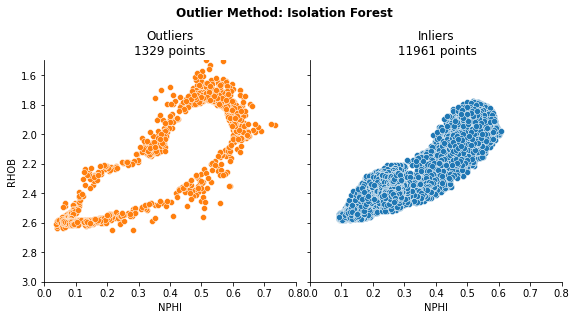

In [14]:
outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);

## Building an Isolation Forest Model Using Multiple Features

In [15]:
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']

In [16]:
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])


/Users/andy/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 1329
Number of non anomalous values  11961
Total Number of Values: 13290


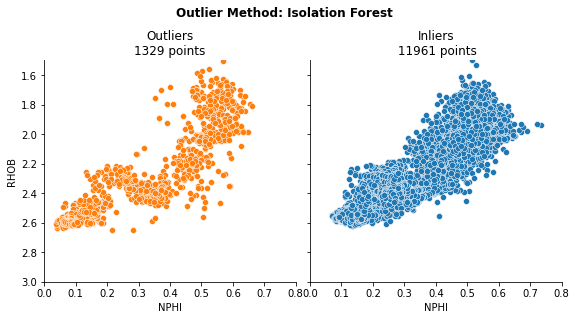

In [17]:
outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);

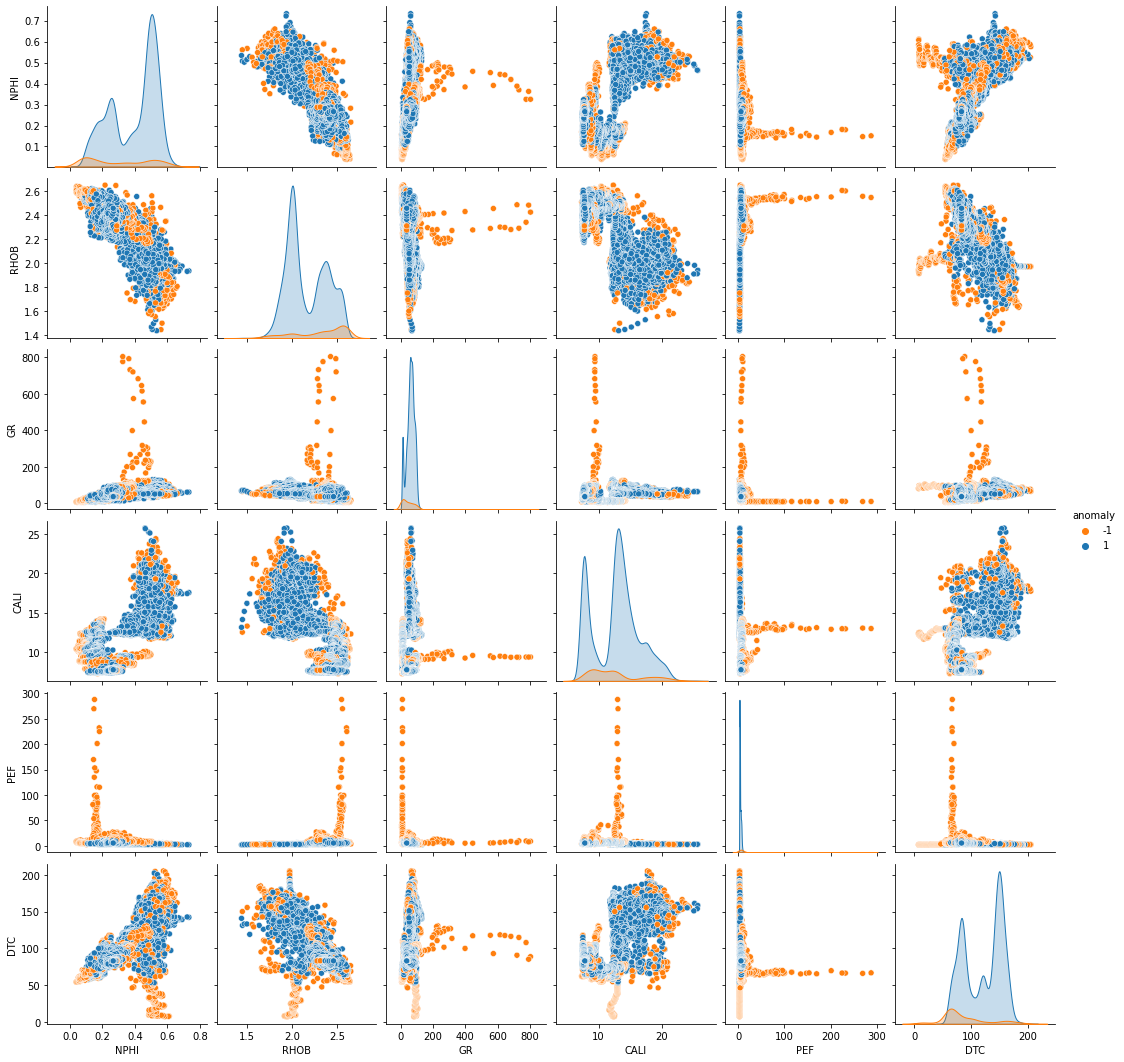

In [18]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)